# Great Energy Predictor - Preprocessing (Meter)
#### Hosted by: ASHRAE
##### Source: https://www.kaggle.com/c/ashrae-energy-prediction

### Dependencies

In [1]:
import src.utils as udf

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# import os

# Pandas on dask
# os.environ['MODIN_ENGINE'] = 'dask'
# import modin.pandas as dd 

# Pandas on ray
# os.environ['MODIN_ENGINE'] = 'ray'
# import ray
# ray.init()
# import modin.pandas as ray

In [2]:
# Plot settings
sns.set(rc={'figure.figsize': (16, 4),
            'font.size': 12})

### Load data

In [3]:
path = '../data/from_pre/'

In [4]:
meter = pd.read_csv(f'{path}metr_bldg.csv', parse_dates=['timestamp'])
meter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052643 entries, 0 to 20052642
Data columns (total 13 columns):
building_id      int64
meter            int64
timestamp        datetime64[ns]
meter_reading    float64
site_id          int64
meter_type       object
dayofyear        int64
month            int64
day              int64
dayofweek        int64
hour             int64
primary_use      object
square_feet      int64
dtypes: datetime64[ns](1), float64(1), int64(9), object(2)
memory usage: 1.9+ GB


In [5]:
meter = udf.reduce_mem_usage(meter)
meter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052643 entries, 0 to 20052642
Data columns (total 13 columns):
building_id      uint16
meter            uint8
timestamp        datetime64[ns]
meter_reading    float32
site_id          uint8
meter_type       category
dayofyear        uint16
month            uint8
day              uint8
dayofweek        uint8
hour             uint8
primary_use      category
square_feet      uint32
dtypes: category(2), datetime64[ns](1), float32(1), uint16(2), uint32(1), uint8(6)
memory usage: 535.5 MB


In [6]:
del path
gc.collect()

22

### Locate missing values and zeroes

In [7]:
# # Source: https://kaggle.com/ganfear/missing-data-and-zeros-visualized
# fig, ax = plt.subplots(1, 4, figsize=(20,30))
# meter.set_index('timestamp', inplace=True)

# for m in range(4):
#     df = meter[meter.meter == m].copy().reset_index()
#     df['timestamp'] = pd.to_timedelta(df.timestamp).dt.total_seconds() / 3600
#     df['timestamp'] = df.timestamp.astype(int)
#     df.timestamp -= df.timestamp.min()
#     missmap = np.empty((1449, df.timestamp.max() + 1))
#     missmap.fill(np.nan)
#     for l in df.values:
#         if l[2] != m:continue
#         missmap[int(l[1]), int(l[0])] = 0 if l[3] == 0 else 1
#     ax[m].set_title(f'meter {m:d}')
#     sns.heatmap(missmap, cmap='Paired', ax=ax[m], cbar=False)

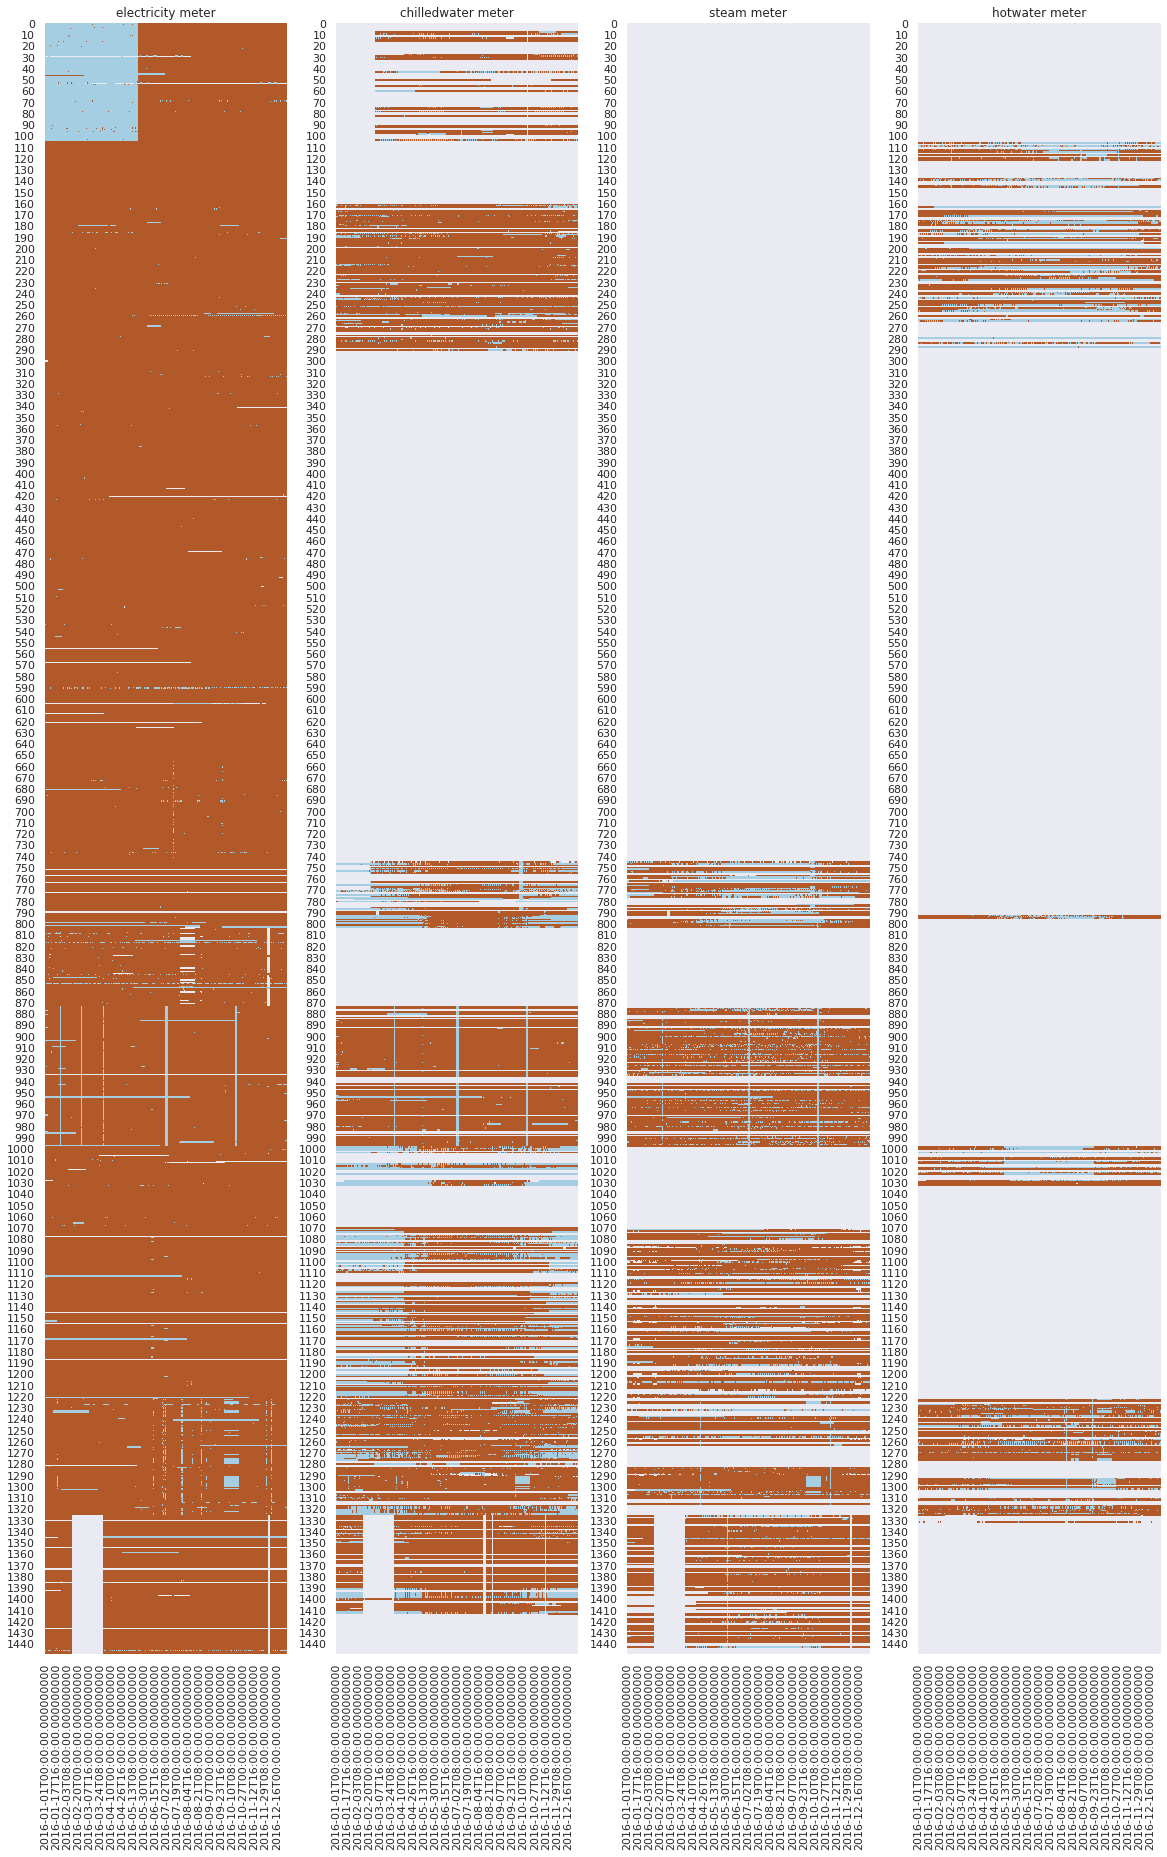

In [8]:
# Adapted from: https://www.kaggle.com/hmendonca/clean-weather-data-eda#Check-the-meter-averages-per-weekday

types = ['electricity', 'chilledwater', 'steam', 'hotwater']
fig, ax = plt.subplots(1, 4, figsize=(20,30))

for m in range(4):
    
    df = meter[meter.meter == m]
    mmap = df.pivot(index='building_id', columns='timestamp', values='meter_reading')
    mmap = mmap.reindex(sorted(meter.building_id.unique()))
    mmap = np.sign(mmap)
    
    sns.heatmap(mmap, cmap='Paired', ax=ax[m], cbar=False)
    ax[m].set_title(f'{types[m]} meter')
    ax[m].set_ylabel(None)
    ax[m].set_xlabel(None)